In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n') #lineterminator is used to set new line

In [87]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [89]:
df.info() #it gives overview of data check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [90]:
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [34]:
df.duplicated().sum() #to counts duplicates values 

0

In [9]:
df.describe() #it gives overview of data (Only for int and fload values)

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary

we have a dataframe consist of 9827 rows and 9 columns.
our dataset looks a bit tidy with no NaNS nor duplicate value.
Relase_Date column needs to be casted into date time and to extract only the year value.
Overview , original_language and Poster-Url Wouldn't be so useful during analysis so we drop that column.
There is noticable outliers in popularity columns
vote_Average better be categorised for proper analysis
Genre Columns has comma seprated Values and white spaces that needs to be handled and casted into category .

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) #convert string data in date.
print(df['Release_Date'].dtypes) 




datetime64[ns]


In [75]:
df['Release_Date']= df['Release_Date'].dt.year #extract year 
df['Release_Date'].dtypes
 

AttributeError: Can only use .dt accessor with datetimelike values

In [36]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Droping columns 

In [45]:
cols= ['Overview' , 'Original_Language' , 'Poster_Url'] #If you want to drop columns don't  want.

In [46]:
df.drop(cols , axis =1 , inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [47]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery


# Categorizing Vote_Average columns

Convert Vote_Average values and makes 4 categories : Popular , average ,below_avg , not_popular to be provided above .


In [7]:
def catigorize_col(df , col , labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max'] ]
    
    df[col] = pd.cut(df[col] , edges , labels = labels  , duplicates = 'drop') #cut function use for categorization.
    return df
 

In [66]:
labels = ['not_popular' , 'below_avg' , ' average' ,'Popular']

catigorize_col(df , 'Vote_Average' , labels)
    
df['Vote_Average'].unique()

['Popular', 'below_avg', ' average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < ' average' < 'Popular']

In [67]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,Popular,Crime
4,2022-03-01,The Batman,3827.658,1151,Popular,Mystery


In [11]:
df['Original_Language'].value_counts()
df['Vote_Average'].value_counts() # counts values by group by 

not_popular    2467
Popular        2450
 average       2412
below_avg      2398
Name: Vote_Average, dtype: int64

In [17]:
df.dropna(inplace = True)# remove nan values permanently
df.isna().sum()

Release_Date         0.0
Title                0.0
Overview             0.0
Popularity           0.0
Vote_Count           0.0
Vote_Average         0.0
Original_Language    0.0
Genre                0.0
Poster_Url           0.0
dtype: float64

# we split generes into a list

In [42]:
df['Genre'] = df['Genre'].astype(object).str.split(', ')
df = df.explode('Genre').reset_index(drop=True) #use for break the string values into new lines .
print(df.head(6))

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2021-12-15  Spider-Man: No Way Home   
2   2021-12-15  Spider-Man: No Way Home   
3   2022-03-01               The Batman   
4   2022-03-01               The Batman   
5   2022-03-01               The Batman   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  Peter Parker is unmasked and no longer able to...    5083.954        8940   
2  Peter Parker is unmasked and no longer able to...    5083.954        8940   
3  In his second year of fighting crime, Batman u...    3827.658        1151   
4  In his second year of fighting crime, Batman u...    3827.658        1151   
5  In his second year of fighting crime, Batman u...    3827.658        1151   

   Vote_Average Original_Language            Genre  \
0           8.3                en           Action   
1           8.3              

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       25793 non-null  object 
 1   Title              25793 non-null  object 
 2   Overview           25793 non-null  object 
 3   Popularity         25793 non-null  float64
 4   Vote_Count         25793 non-null  int64  
 5   Vote_Average       25793 non-null  float64
 6   Original_Language  25793 non-null  object 
 7   Genre              25793 non-null  object 
 8   Poster_Url         25793 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


In [48]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery


# Data Visulization

In [56]:
sns.set_style('whitegrid') #white background 

# What is the most frequent genre of movies released on Netflix ?

In [57]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

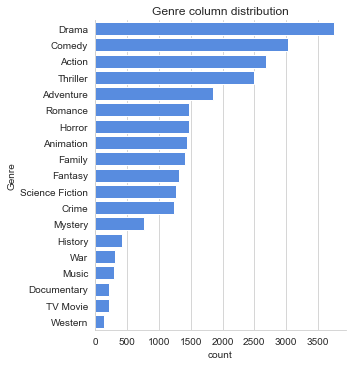

In [64]:
#sns.catplot( y = 'Genre' , data = df , kind ='count')
#             order = df[ ].value_counts().index,
#             color ='#4287f5'
# Create a count plot for the 'Genre' column
sns.catplot(
    y= 'Genre', 
    data=df, 
    kind='count', 
    order=df['Genre'].value_counts().index, 
    color='#4287f5' 
)
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column ?

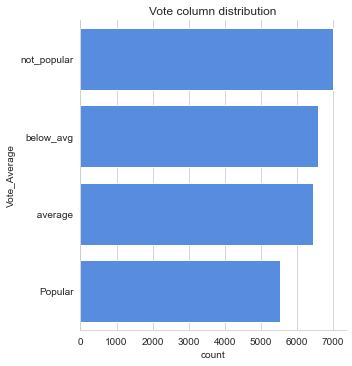

In [69]:
sns.catplot(
    y='Vote_Average', 
    data=df, 
    kind='count', 
    order=df['Vote_Average'].value_counts().index, 
    color='#4287f5'
)
plt.title('Vote column distribution')
plt.show()

# Which movie got the higest popularity what's its genre?


In [72]:
# df.head()
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


In [82]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25790,1984-09-23,Threads,13.354,186,Popular,War,1984
25791,1984-09-23,Threads,13.354,186,Popular,Drama,1984
25792,1984-09-23,Threads,13.354,186,Popular,Science Fiction,1984


# Which year has most filmed movies? 

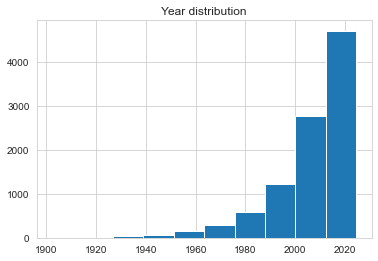

In [92]:
df['Release_Date'].hist()
plt.title('Year distribution')
plt.show()

In [91]:
# Convert to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract the year
df['Year'] = df['Release_Date'].dt.year


In [81]:
print(df['Release_Date'].dtype)


datetime64[ns]
